In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_val_score

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/rakanalharbi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [57]:
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}
url = "https://www.cars.com/shopping/results/?list_price_max=&makes[]=mitsubishi&maximum_distance=20&models[]=mitsubishi-outlander&page=1&page_size=100&stock_type=used&zip=42615"
response = requests.get(url,headers=headers)
soup = BeautifulSoup(response.content,'html.parser')

In [58]:
price =[]

for element in soup.find_all('span', class_='primary-price'):
    price.append(element.text.strip())
    
    
print(len(price))

99


In [59]:
mile_num =[]

for element in soup.find_all('div', class_="mileage"):
    mile_num.append(element.text.strip())
                 
                 
print(len(mile_num))

99


In [60]:
Evaluation =[]

for element in soup.find_all('span', class_="sds-rating__count"):
    Evaluation.append(element.text.strip())
                 
                 
print(len(Evaluation))

96


In [61]:
reviews =[]

for element in soup.find_all('span', class_="sds-rating__link sds-button-link"):
    reviews.append(element.text.strip())
    
    
print(len(reviews))

99


In [62]:
car_model = []

for element in soup.find_all('h2', class_= "title"):
    car_model.append(element.text.strip())
    

    
print(len(car_model))

99


In [63]:
T=price,mile_num,Evaluation,reviews,car_model
cars = pd.DataFrame(T).T  #transpose
cars.columns = ['price', 'mile_num','Evaluation', 'reviews','car_model']

cars.shape

(99, 5)

In [64]:
cars = cars.dropna()

In [65]:
cars.head()

,price,mile_num,Evaluation,reviews,car_model
0,"$18,888","11,542 mi.",3.4,(28 reviews),2019 Mitsubishi Outlander ES
1,"$22,200","12,128 mi.",4.7,(325 reviews),2020 Mitsubishi Outlander ES
2,"$3,995","187,365 mi.",3.1,(29 reviews),2008 Mitsubishi Outlander XLS
3,"$18,999","35,266 mi.",4.9,"(25,015 reviews)",2018 Mitsubishi Outlander ES
4,"$12,950","89,950 mi.",3.9,(17 reviews),2016 Mitsubishi Outlander SE


In [66]:
cars['price'] = cars['price'].apply(lambda x: float(x.replace('$','').replace(',','') ))

In [67]:
cars['mile_num'] = cars['mile_num'].apply(lambda x: float(x.replace('mi','').replace('.','').replace(',','')  ))

In [68]:
cars['Evaluation'] = cars['Evaluation'].apply(lambda x: float(x))

In [69]:
cars['reviews'] = cars['reviews'].apply(lambda x: float(x.split(' ')[0].replace('(','').replace(',','')))

In [70]:
cars['car_model'] = cars['car_model'].apply(lambda x: float(x.split(' ')[0]))

In [71]:
cars.head()

,price,mile_num,Evaluation,reviews,car_model
0,18888.0,11542.0,3.4,28.0,2019.0
1,22200.0,12128.0,4.7,325.0,2020.0
2,3995.0,187365.0,3.1,29.0,2008.0
3,18999.0,35266.0,4.9,25015.0,2018.0
4,12950.0,89950.0,3.9,17.0,2016.0


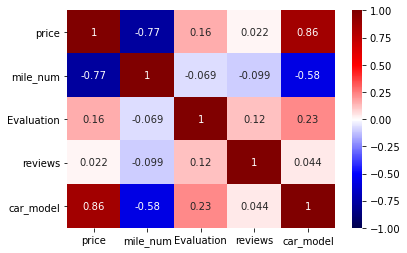

In [72]:
#sns heatmap all data
sns.heatmap(cars.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [73]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       96 non-null     float64
 1   mile_num    96 non-null     float64
 2   Evaluation  96 non-null     float64
 3   reviews     96 non-null     float64
 4   car_model   96 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB


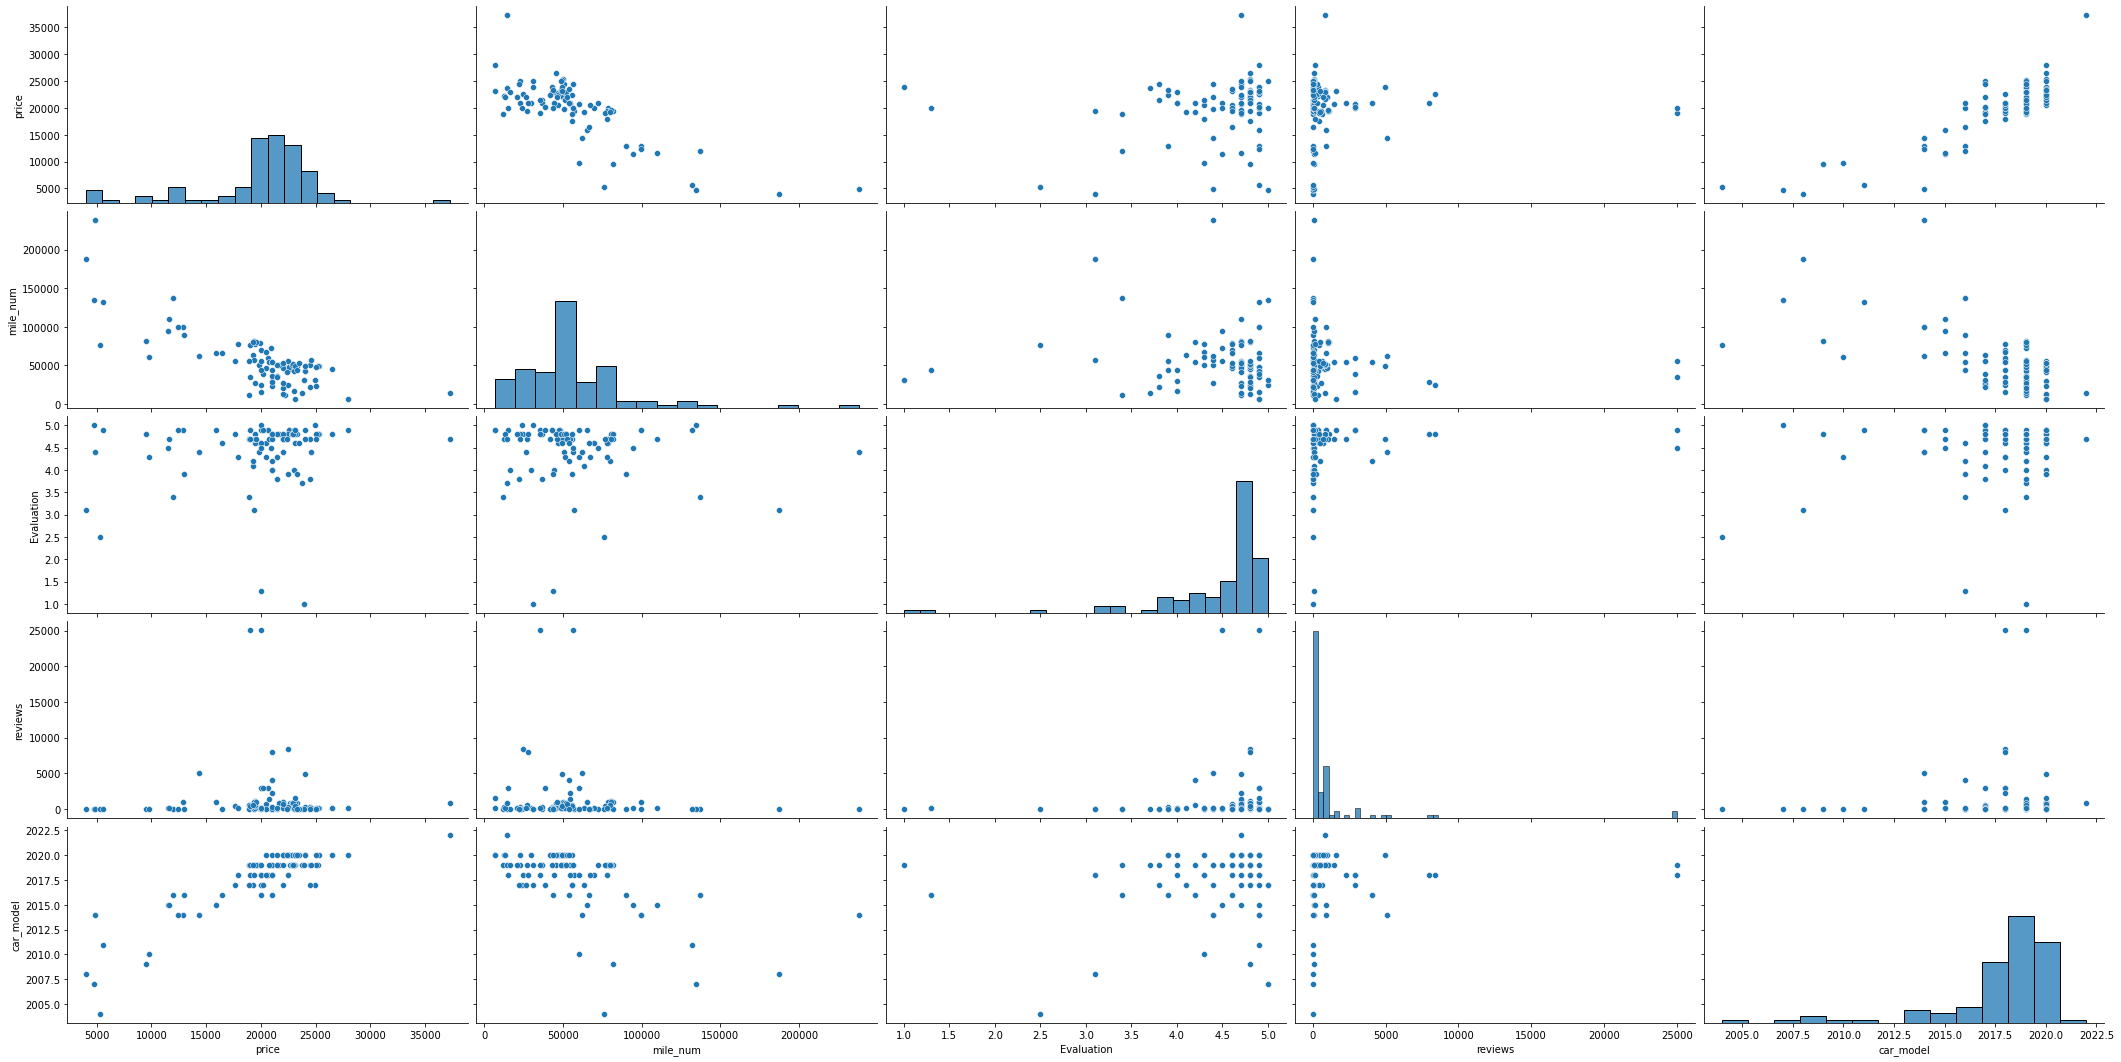

In [74]:
#sns pairplot all data
sns.pairplot(cars, height=3, aspect=2);

In [86]:
columns = ['price','mile_num','Evaluation','car_model']
lables = cars['reviews'].values
features = cars[list(columns)].values

In [87]:
#Building a model using a linear algorithm
X_train, X_test, y_train,y_test=train_test_split(features,lables, test_size=0.30)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
clf = RandomForestClassifier(n_estimators=3)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3)

In [89]:
accurcy = clf.score(X_train,y_train)
print(accurcy)

0.8955223880597015


In [90]:
ypredict = clf.predict(X_train)
print (y_train, ypredict)

[8.3630e+03 1.4570e+03 4.0480e+03 8.6100e+02 2.5015e+04 4.0000e+01
 6.3000e+01 1.5000e+01 9.4400e+02 1.6800e+02 3.3000e+01 9.4400e+02
 1.5000e+01 0.0000e+00 3.0200e+02 2.2580e+03 8.6000e+01 9.3300e+02
 5.8000e+01 1.0350e+03 1.3000e+01 1.7200e+02 1.0350e+03 4.6200e+02
 8.6100e+02 3.2100e+02 3.2500e+02 4.0000e+00 1.4000e+01 0.0000e+00
 2.9020e+03 4.9370e+03 9.7000e+01 6.3000e+01 4.1000e+01 3.7000e+01
 3.3000e+01 1.0730e+03 7.8000e+01 8.2000e+01 8.6100e+02 6.3000e+01
 1.2200e+02 1.0000e+02 3.0000e+01 3.2100e+02 8.6000e+01 1.4400e+02
 1.0000e+00 7.4000e+01 5.0550e+03 5.4600e+02 1.0350e+03 1.0000e+00
 3.2100e+02 2.6000e+01 2.9020e+03 6.0300e+02 3.1400e+02 6.3000e+01
 9.5000e+01 5.0000e+00 4.8500e+02 8.7000e+01 8.5000e+01 7.9840e+03
 2.3200e+02] [1.680e+02 1.457e+03 4.048e+03 8.610e+02 1.500e+01 4.000e+01 6.300e+01
 1.500e+01 8.500e+01 1.680e+02 3.300e+01 9.440e+02 1.500e+01 0.000e+00
 3.020e+02 4.000e+00 8.600e+01 9.330e+02 5.800e+01 1.035e+03 1.300e+01
 1.720e+02 1.035e+03 4.620e+02 8.610e

In [91]:
#show score X_test and y_test
accurcy = clf.score(X_test,y_test)
print(accurcy)

0.1724137931034483


In [92]:
#confusion Matrix and classification report for the testing sample
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sypredict = clf.predict(X_train)
print(classification_report(y_train,ypredict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         4.0       0.50      1.00      0.67         1
         5.0       0.50      1.00      0.67         1
        13.0       1.00      1.00      1.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.40      1.00      0.57         2
        26.0       1.00      1.00      1.00         1
        30.0       1.00      1.00      1.00         1
        33.0       1.00      0.50      0.67         2
        37.0       1.00      1.00      1.00         1
        40.0       1.00      1.00      1.00         1
        41.0       1.00      1.00      1.00         1
        58.0       1.00      1.00      1.00         1
        63.0       1.00      1.00      1.00         4
        74.0       1.00      1.00      1.00         1
        78.0       1.00      1.00      1.00         1
        82.0       1.00    

/Users/rakanalharbi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakanalharbi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakanalharbi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [93]:
print(confusion_matrix(y_train,ypredict))

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [94]:
ypredict = clf.predict(X_test)
print(classification_report(y_test,ypredict))
print(confusion_matrix(y_test,ypredict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         8.0       0.00      0.00      0.00         1
        11.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         0
        27.0       0.00      0.00      0.00         1
        28.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         1
        58.0       0.00      0.00      0.00         1
        63.0       0.00      0.00      0.00         0
        65.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         1
        74.0       0.00      0.00      0.00         0
        77.0       0.00    

/Users/rakanalharbi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakanalharbi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rakanalharbi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

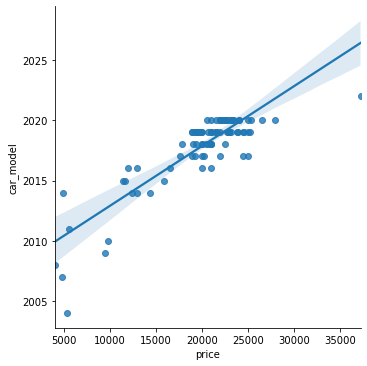

In [95]:
# sns plot price between car_model
sns.lmplot(x="price", y="car_model", data=cars);

<AxesSubplot:xlabel='car_model', ylabel='count'>

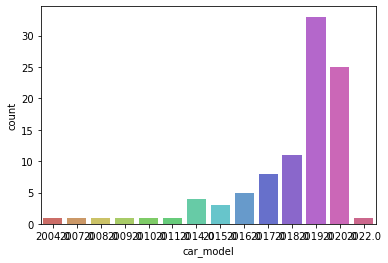

In [112]:
sns.countplot(x='car_model',data=cars, palette='hls')


In [97]:
#Trying to improve the model using a Standard Scaler scaling
columns = ['price','mile_num','Evaluation','reviews','car_model']
labels = cars['price'].values
features = cars[list(columns)].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

import sys
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [113]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print (Accuracy)

accuracy = regr.score(X_test, y_test)
print  (accuracy)

1.0
1.0
